In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from scipy import stats
pd.set_option('display.max_columns',None)

df_site = pd.read_csv(r"C:\Users\17204\Desktop\Thinkful\Capstone 1_Experimental Design\data\since_1980\SITE_INFO.csv")
df_waterlevel= pd.read_csv(r"C:\Users\17204\Desktop\Thinkful\Capstone 1_Experimental Design\data\since_1980\WATERLEVEL.csv",dtype={"Comment": "string", "Original Direction": "string"})


df_site.info()
df_waterlevel.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 49 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   AgencyCd            299 non-null    object 
 1   SiteNo              299 non-null    int64  
 2   AgencyNm            299 non-null    object 
 3   SiteName            299 non-null    object 
 4   DecLatVa            299 non-null    float64
 5   DecLongVa           299 non-null    float64
 6   HorzDatum           299 non-null    object 
 7   HorzMethod          299 non-null    object 
 8   HorzAcy             299 non-null    object 
 9   AltVa               299 non-null    float64
 10  AltUnits            299 non-null    int64  
 11  AltUnitsNm          299 non-null    object 
 12  AltDatumCd          299 non-null    object 
 13  AltMethod           299 non-null    object 
 14  AltAcy              299 non-null    object 
 15  WellDepth           299 non-null    float64
 16  WellDept

# Data Import and Cleaning
Data is derived from the National Ground-Water Monitoring Network (NGWMN:https://cida.usgs.gov/ngwmn/learnmore.jsp ).  Data is composed of two separate csv files (water levels, well site information).  

In [2]:
# change type of select series to numeric
df_waterlevel['Water level in feet relative to NAVD88'] = pd.to_numeric(df_waterlevel['Water level in feet relative to NAVD88'],errors='coerce')
df_waterlevel['Depth to Water Below Land Surface in ft.'] = pd.to_numeric(df_waterlevel['Depth to Water Below Land Surface in ft.'],errors='coerce')


In [3]:
# Drop columns from waterlevel and site dfs
df_waterlevel= df_waterlevel.drop(columns=['AgencyCd', 'Original Parameter', 'Accuracy Value', 'Original Value', 'Data Provided by', 'Unnamed: 14','Original Direction', 'Original Unit','Accuracy Unit', 'Comment','Observation Method'])
df_site = df_site.drop(columns=['AgencyCd','SiteName','HorzDatum', 'Link', 'AgencyNm','WlSysName','AltAcy','AltUnitsNm','AltMethod','WellDepthUnitsNm','HorzMethod','HorzAcy','AltUnits','AltDatumCd','WellDepthUnits','NatAquiferCd','CountryCd','CountryNm','StateCd','StateNm','CountyCd','LocalAquiferCd','SiteType','QwSnFlag', 'QwSnDesc','QwBaselineFlag','QwBaselineDesc','WlWellChars','WlWellCharsDesc','WlWellType','WlWellPurposeDesc','WlWellPurposeNotes','LithDataProvider','ConstDataProvider','WlWellPurpose','WlWellTypeDesc','WlBaselineDesc','WlBaselineFlag','WlSnDesc','WlSnFlag'])

# Change errors in string objects
df_site['NatAqfrDesc']= df_site['NatAqfrDesc'].replace('Rio Grande aquifersystem', 'Rio Grande aquifer system') 
df_site['LocalAquiferName']= df_site['LocalAquiferName'].replace('Ogallala', 'Ogallala aquifer')
df_site['LocalAquiferName']= df_site['LocalAquiferName'].replace('Ogallala Formation', 'Ogallala aquifer')
df_site['well'] = 'well'

# rename select series
df_waterlevel = df_waterlevel.rename(columns={'Depth to Water Below Land Surface in ft.':'water_depth'})
df_waterlevel = df_waterlevel.rename(columns={'Water level in feet relative to NAVD88':'water_level_elev'})

# convert water depth to negative value
df_waterlevel['water_depth'] = df_waterlevel['water_depth']*-1

# df_site['county'] = df_site["CountyNm"].replace('County', '')
df_site['state'] = df_site["StateNm"]="CO"
df_waterlevel.info()
df_site.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66460 entries, 0 to 66459
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   SiteNo            66460 non-null  int64  
 1   Time              66460 non-null  object 
 2   water_depth       66460 non-null  float64
 3   water_level_elev  66460 non-null  float64
dtypes: float64(2), int64(1), object(1)
memory usage: 2.0+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   SiteNo            299 non-null    int64  
 1   DecLatVa          299 non-null    float64
 2   DecLongVa         299 non-null    float64
 3   AltVa             299 non-null    float64
 4   WellDepth         299 non-null    float64
 5   NatAqfrDesc       299 non-null    object 
 6   CountyNm          299 non-null    object 
 7   LocalAquiferNam

In [4]:
df_site.head()

,SiteNo,DecLatVa,DecLongVa,AltVa,WellDepth,NatAqfrDesc,CountyNm,LocalAquiferName,AquiferType,well,state,StateNm
0,704,39.631663,-102.090366,3569.97,62.0,High Plains aquifer,Yuma County,Ogallala aquifer,UNCONFINED,well,CO,CO
1,149917,38.856533,-102.258965,4126.00,322.0,High Plains aquifer,Cheyenne County,Ogallala aquifer,UNCONFINED,well,CO,CO
2,987,38.903629,-102.054474,3874.25,275.0,High Plains aquifer,Cheyenne County,Ogallala aquifer,UNCONFINED,well,CO,CO
3,993,38.913613,-102.528250,4526.86,222.0,High Plains aquifer,Cheyenne County,Ogallala aquifer,UNCONFINED,well,CO,CO
4,990,38.944447,-102.410469,4384.10,230.0,High Plains aquifer,Cheyenne County,Ogallala aquifer,UNCONFINED,well,CO,CO


In [5]:
# Parse date to just year,month,day 
df_waterlevel['DateEdit'] = df_waterlevel['Time'].str[0:10]
print( df_waterlevel['Time'],df_waterlevel['DateEdit'])

0        1986-12-08T00:00:00-07:00
1        1988-02-18T00:00:00-07:00
2        1989-01-14T00:00:00-07:00
3        1990-01-26T00:00:00-07:00
4        1991-01-17T00:00:00-07:00
                   ...            
66455    2016-01-19T00:00:00-07:00
66456    2017-02-13T00:00:00-07:00
66457    2018-01-29T00:00:00-07:00
66458    2019-02-26T00:00:00-07:00
66459    2020-01-29T00:00:00-07:00
Name: Time, Length: 66460, dtype: object 0        1986-12-08
1        1988-02-18
2        1989-01-14
3        1990-01-26
4        1991-01-17
            ...    
66455    2016-01-19
66456    2017-02-13
66457    2018-01-29
66458    2019-02-26
66459    2020-01-29
Name: DateEdit, Length: 66460, dtype: object


In [6]:
# converting date to datetime series
df_waterlevel['DateEdit'] = pd.to_datetime(df_waterlevel['DateEdit'], format='%Y %m %d', errors = 'coerce')


In [7]:
# Merge datasheets on SiteNo unique identifier
df = pd.merge(df_waterlevel, df_site, on = 'SiteNo', how = 'outer')
df.head()
# df.describe()


,SiteNo,Time,water_depth,water_level_elev,DateEdit,DecLatVa,DecLongVa,AltVa,WellDepth,NatAqfrDesc,CountyNm,LocalAquiferName,AquiferType,well,state,StateNm
0,704,1986-12-08T00:00:00-07:00,-18.85,3551.12,1986-12-08,39.631663,-102.090366,3569.97,62.0,High Plains aquifer,Yuma County,Ogallala aquifer,UNCONFINED,well,CO,CO
1,704,1988-02-18T00:00:00-07:00,-19.40,3550.57,1988-02-18,39.631663,-102.090366,3569.97,62.0,High Plains aquifer,Yuma County,Ogallala aquifer,UNCONFINED,well,CO,CO
2,704,1989-01-14T00:00:00-07:00,-19.60,3550.37,1989-01-14,39.631663,-102.090366,3569.97,62.0,High Plains aquifer,Yuma County,Ogallala aquifer,UNCONFINED,well,CO,CO
3,704,1990-01-26T00:00:00-07:00,-19.00,3550.97,1990-01-26,39.631663,-102.090366,3569.97,62.0,High Plains aquifer,Yuma County,Ogallala aquifer,UNCONFINED,well,CO,CO
4,704,1991-01-17T00:00:00-07:00,-19.40,3550.57,1991-01-17,39.631663,-102.090366,3569.97,62.0,High Plains aquifer,Yuma County,Ogallala aquifer,UNCONFINED,well,CO,CO


In [8]:
# Locate first and last water measurment of water depth for each SiteNo.  Then merge with df.
base_depth_df=df.groupby(['SiteNo'])['water_depth'].nth(0)
latest_depth_df= df.groupby(['SiteNo'])['water_depth'].nth(-1)

df = pd.merge(df,base_depth_df, on = 'SiteNo', how = 'inner')
df= pd.merge(df,latest_depth_df, on = 'SiteNo', how = 'inner')

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 66460 entries, 0 to 66459
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   SiteNo            66460 non-null  int64         
 1   Time              66460 non-null  object        
 2   water_depth_x     66460 non-null  float64       
 3   water_level_elev  66460 non-null  float64       
 4   DateEdit          66460 non-null  datetime64[ns]
 5   DecLatVa          66460 non-null  float64       
 6   DecLongVa         66460 non-null  float64       
 7   AltVa             66460 non-null  float64       
 8   WellDepth         66460 non-null  float64       
 9   NatAqfrDesc       66460 non-null  object        
 10  CountyNm          66460 non-null  object        
 11  LocalAquiferName  66460 non-null  object        
 12  AquiferType       66460 non-null  object        
 13  well              66460 non-null  object        
 14  state             6646

In [9]:
# Number of wellsites prior to date filter
print('Total sites in dataset (all dates):',df.SiteNo.nunique())

Total sites in dataset (all dates): 299


In [10]:
# Locate earliest and latest date for each SiteNo

earliest_date_df= df.groupby(['SiteNo'])['DateEdit'].nth(0)
latest_date_df= df.groupby(['SiteNo'])['DateEdit'].nth(-1)

# Merge earliest and latest dates to df
df = pd.merge(df,earliest_date_df, on = 'SiteNo', how = 'inner')
df= pd.merge(df,latest_date_df, on = 'SiteNo', how = 'inner')

# Rename date start and date end
df = df.rename(columns={'DateEdit_y':'datestart'})
df = df.rename(columns={'DateEdit':'dateend'})
df = df.rename(columns={'DateEdit_x':'DateEdit'})

# Apply df filter to isolate wells with data starting prior to 1981 and ending later than 2019

# df = df[(df['datestart']< "1991-01-01") & (df['dateend'] > "2019-01-01")]
print('Total sites with data prior to 1981 and after 2018:', df.SiteNo.nunique())
df.info()

Total sites with data prior to 1981 and after 2018: 299
<class 'pandas.core.frame.DataFrame'>
Int64Index: 66460 entries, 0 to 66459
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   SiteNo            66460 non-null  int64         
 1   Time              66460 non-null  object        
 2   water_depth_x     66460 non-null  float64       
 3   water_level_elev  66460 non-null  float64       
 4   DateEdit          66460 non-null  datetime64[ns]
 5   DecLatVa          66460 non-null  float64       
 6   DecLongVa         66460 non-null  float64       
 7   AltVa             66460 non-null  float64       
 8   WellDepth         66460 non-null  float64       
 9   NatAqfrDesc       66460 non-null  object        
 10  CountyNm          66460 non-null  object        
 11  LocalAquiferName  66460 non-null  object        
 12  AquiferType       66460 non-null  object        
 13  well              66

In [11]:
# Add delta depth and total depth change columns

df['delta_base_level']= df['water_depth_x']-df['water_depth_y']
df['total_delta']=df['water_depth']-df['water_depth_y']

# Remove 1 outlier
remove_outliers = df['total_delta'] < 150
df = df[remove_outliers]


In [12]:
# Create 4 dataframes filtered by decade
df_80_90 = df[df['DateEdit']< "1990-01-01"]
df_90_00 = df[(df['DateEdit']>= "1990-01-01") & (df['DateEdit']< "2000-01-01")]
df_00_10 = df[(df['DateEdit']>= "2000-01-01") & (df['DateEdit']< "2010-01-01")]
df_10_20 = df[(df['DateEdit']>= "2010-01-01") & (df['DateEdit']< "2020-01-01")]

# Total number of measurments for all Sites for each decade
print('1980-1990 measurements:',len(df_80_90[df_80_90.delta_base_level > -500]))
print('1990-2000 measurements:', len(df_90_00[df_90_00.delta_base_level>=-500]))
print('2000-2010 measurements:', len(df_00_10[df_00_10.delta_base_level>=-500]))
print('2010-2020 measurements:', len(df_10_20[df_10_20.delta_base_level>=-500]))

1980-1990 measurements: 4065
1990-2000 measurements: 5391
2000-2010 measurements: 10620
2010-2020 measurements: 45377


# View Well Level Distributions and Stats

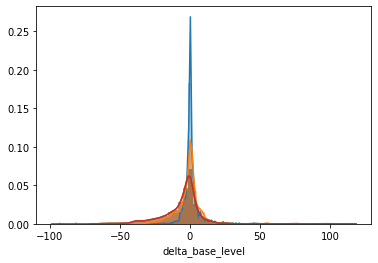

In [13]:
# Historgram plot of change in water levels sorted by decade

site_80_90= df_80_90.groupby([pd.Grouper(key ='DateEdit',freq = '1Y'), 'SiteNo']).delta_base_level.mean().reset_index()
ax = sns.distplot(site_80_90['delta_base_level'], bins=50)
site_90_00= df_90_00.groupby([pd.Grouper(key ='DateEdit',freq = '1Y'), 'SiteNo']).delta_base_level.mean().reset_index()
ax = sns.distplot(site_90_00['delta_base_level'], bins=50)
site_00_10= df_00_10.groupby([pd.Grouper(key ='DateEdit',freq = '1Y'), 'SiteNo']).delta_base_level.mean().reset_index()
ax = sns.distplot(site_00_10['delta_base_level'], bins=50)
site_10_20= df_10_20.groupby([pd.Grouper(key ='DateEdit',freq = '1Y'), 'SiteNo']).delta_base_level.mean().reset_index()
ax = sns.distplot(site_00_10['delta_base_level'], bins=50)


In [14]:
# Stats for change in water level for each decade
print('1980-1990:',stats.describe(df_80_90['delta_base_level']))
# print('1990-2000:',stats.describe(df_90_00['delta_base_level']))
# print('2000-2010:',stats.describe(df_00_10['delta_base_level']))
print('2010-2020:',stats.describe(df_10_20['delta_base_level']))

1980-1990: DescribeResult(nobs=4065, minmax=(-97.47, 83.47999999999999), mean=2.0044526445264452, variance=53.24730152734598, skewness=-0.8760548569084959, kurtosis=41.16513541352289)
2010-2020: DescribeResult(nobs=45377, minmax=(-143.21000000000004, 111.30000000000001), mean=-2.3667866981069685, variance=84.60551215110301, skewness=1.1121378589638857, kurtosis=35.408718846901735)


# Inital Comparison:  1980-1990, 2010-2020 Water Levels

In [15]:
# Calculate difference in means with 95% confidence

import math
def get_95_ci(array_1, array_2):
    sample_1_n = array_1.shape[0]
    sample_2_n = array_2.shape[0]
    sample_1_mean = array_1.mean()
    sample_2_mean = array_2.mean()
    sample_1_var = array_1.var()
    sample_2_var = array_2.var()
    mean_difference = sample_2_mean - sample_1_mean
    std_err_difference = math.sqrt((sample_1_var/sample_1_n)+(sample_2_var/sample_2_n))
    margin_of_error = 1.96 * std_err_difference
    ci_lower = mean_difference - margin_of_error
    ci_upper = mean_difference + margin_of_error
    return("The difference in means at the 95% confidence interval (two-tail) is between "+str(ci_lower)+" and "+str(ci_upper)+" feet.")
get_95_ci(df_80_90['delta_base_level'], df_10_20['delta_base_level'])


'The difference in means at the 95% confidence interval (two-tail) is between -4.610996852547882 and -4.13148183271896 feet.'

# Perform T-Test
Results indicate well depth distributions from 1980-1990 differ signifcantly from well depth distributions from 2010-2020.  

In [16]:
# Comparing water levels changes from 1980-1990 to water level changes 2010-2020
stats.ttest_ind(df_80_90['delta_base_level'], df_10_20['delta_base_level'])
# This T-Test is > 1.96 and the p-value is < .05, indicating there is significant difference in sample distributions

Ttest_indResult(statistic=29.47976927406393, pvalue=2.300550833242e-189)

# Test of Normal Distribution: Shapiro Wilk
Based on Shapiro Wilk test results, distributions of changes in water levels from 1980 to 1990 and 2010 to 2020 are not normally distributed (ie. p-values is not less than 0.05 and W is not close to 1).  Therefore the above T-Test is not a valid test to discern whether early water depth measurments are significantly different thand later water depth measurments.  



In [17]:
print(stats.shapiro(df_80_90['delta_base_level']))
print(stats.shapiro(df_10_20['delta_base_level']))

(0.7209599018096924, 0.0)
(0.7084194421768188, 0.0)


C:\Users\17204\anaconda3\lib\site-packages\scipy\stats\morestats.py:1676: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


# Test Non-Normal Distribution: Kruskal
Because the distributions tested as non-normal, a Kruskal test is performed.  The results of this test (very low p-value) indicated we can reject the null that all variables have the same distribution.  

In [18]:
stats.kruskal(df_80_90['delta_base_level'], df_10_20['delta_base_level'])


KruskalResult(statistic=1603.5994852715612, pvalue=0.0)

# Summary Point Plot by Decade

[[Text(0, 0, '1980-1990'),
  Text(0, 0, '1990-2000'),
  Text(0, 0, '2000-2010'),
  Text(0, 0, '2010-2020')]]

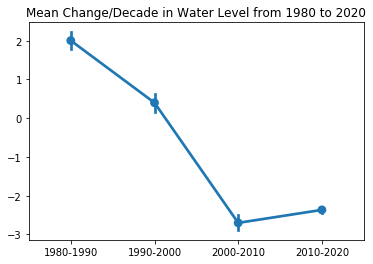

In [19]:
# The point plot below shows, on average, ground water levels began to decrease in level between 2000-2010, and have continued to decrease to 2020
g = sns.pointplot(data=[df_80_90['delta_base_level'],df_90_00['delta_base_level'],df_00_10['delta_base_level'],
                        df_10_20['delta_base_level']],)
plt.title('Mean Change/Decade in Water Level from 1980 to 2020')
g.set(xticklabels = ['1980-1990','1990-2000','2000-2010', '2010-2020'])

# Plots of Ground Water Change Through Time
Below is a series of groundwater plots grouped by well site with values averaged on 2 year intervals.  

In [20]:
# Group by site and take mean value for every 2 years
site_group= df.groupby([pd.Grouper(key = 'DateEdit', freq='2Y'), 'SiteNo']).delta_base_level.mean().reset_index()

[[Text(0, 0, '1980-1990'),
  Text(0, 0, '1990-2000'),
  Text(0, 0, '2000-2010'),
  Text(0, 0, '2010-2020')]]

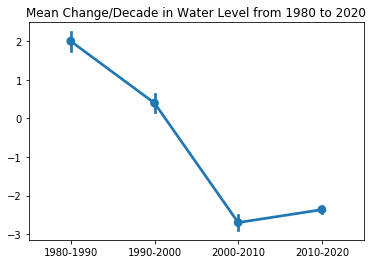

In [21]:
# The point plot below shows, on average, ground water levels began to decrease in level between 2000-2010, and have continued to decrease to 2020
g = sns.pointplot(data=[df_80_90['delta_base_level'],df_90_00['delta_base_level'],df_00_10['delta_base_level'],
                        df_10_20['delta_base_level']],)
plt.title('Mean Change/Decade in Water Level from 1980 to 2020')
g.set(xticklabels = ['1980-1990','1990-2000','2000-2010', '2010-2020'])

# Average Water Level Changes 1980-2020: All Wells
On average water levels began to decrease between 1995-2000, and generally continued decreasing to 2020.  Total decrease is ~10'.  

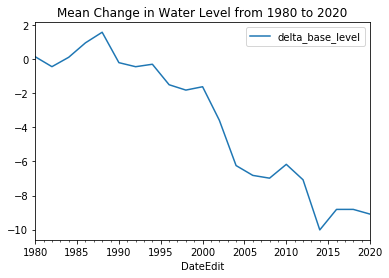

In [22]:
fig = site_group[site_group.delta_base_level>=-500][
    ['DateEdit', 'delta_base_level']].groupby('DateEdit').mean().plot()
plt.title('Mean Change in Water Level from 1980 to 2020')
plt.show()

# Water Level Changes 1980-2020: All Wells
Although most wells show a decrease in water levels through time, some are flat or have increased since 1980.  

Text(0.5, 1.0, 'Change in Ground Water Levels/Well Site 1980 to 2020')

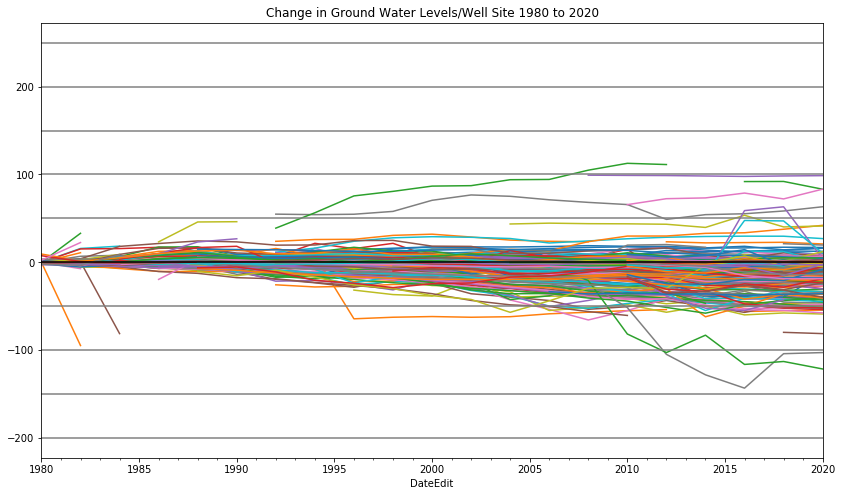

In [23]:
# View ground water change from 1980-2020 for all well sites
ax = site_group.pivot('DateEdit','SiteNo','delta_base_level').plot()
ax.legend_.remove()

plt.gcf().set_size_inches(14,8)
ax.axhline(250, color ='gray')
ax.axhline(200, color ='gray')
ax.axhline(150, color ='gray')
ax.axhline(100,color ='gray')
ax.axhline(50, color ='gray')
ax.axhline(0, color ='black')
ax.axhline(-50,color ='gray')
ax.axhline(-100, color ='gray')
ax.axhline(-150,color ='gray')
ax.axhline(-200,color ='gray')
plt.title('Change in Ground Water Levels/Well Site 1980 to 2020')


# Water Level Change: Aquifer System

,NatAqfrDesc,count,mean,std,min,25%,50%,75%,max
0,Alluvial aquifers,6488.0,-1.490000,1.720978e-13,-1.49,-1.49,-1.49,-1.49,-1.49
1,Colorado Plateaus aquifers,16561.0,-5.229444,9.938255e+00,-54.32,-13.53,-2.73,0.71,83.20
2,Denver Basin aquifer system,22590.0,3.085462,8.677661e+00,-20.69,-0.06,2.83,7.43,98.80
3,High Plains aquifer,5062.0,-15.588451,2.252281e+01,-123.29,-30.64,-6.63,-0.23,41.19
4,Rio Grande aquifer system,15731.0,-6.230348,8.139807e+00,-34.90,-10.74,-3.70,0.03,41.34


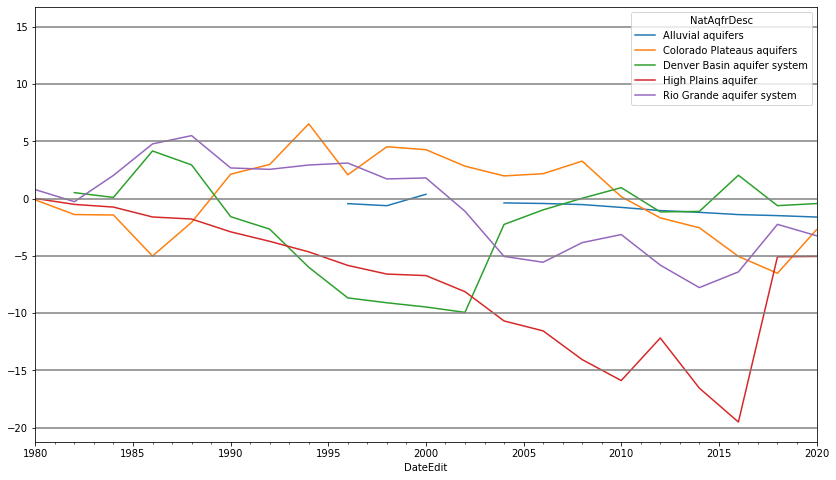

In [24]:
# Group by Geographic Aquifer System
aqfr_group = df.groupby([pd.Grouper(key = 'DateEdit', freq='2Y'), 'NatAqfrDesc']).delta_base_level.mean().reset_index()# Plot change in ground water levels 1980-2020 grouped by Geographic Aquifer System
ax =aqfr_group.pivot('DateEdit','NatAqfrDesc','delta_base_level').plot()
plt.gcf().set_size_inches(14,8)
ax.axhline(0, color ='gray')
ax.axhline(-5, color ='gray')
ax.axhline(-10, color ='gray')
ax.axhline(-15, color ='gray')
ax.axhline(5, color ='gray')
ax.axhline(10, color ='gray')
ax.axhline(15, color ='gray')
ax.axhline(-20, color ='gray')

aquifer= df.groupby(['NatAqfrDesc']).total_delta.describe().reset_index()
aquifer.head(30)

# Water Level Change: Aquifer Formation 

,LocalAquiferName,count,mean,std,min,25%,50%,75%,max
12,Ogallala aquifer,5034.0,-15.668204,2.255989e+01,-123.29,-30.64,-6.66,-0.23,41.19
6,Fruitland Aquifer,39.0,-8.400000,1.799578e-15,-8.40,-8.40,-8.40,-8.40,-8.40
7,Green River Formation,11852.0,-8.292939,7.517424e+00,-17.32,-17.32,-13.53,0.71,0.71
13,San Jose Aquifer,23.0,-6.410000,2.724420e-15,-6.41,-6.41,-6.41,-6.41,-6.41
1,Cenozoic Erathem,15731.0,-6.230348,8.139807e+00,-34.90,-10.74,-3.70,0.03,41.34
0,Arapahoe Conglomerate Member of Laramie Formation,622.0,-5.451897,1.083876e+01,-20.69,-20.69,-0.48,4.38,4.38
11,Morrison Aquifer,19.0,-3.680000,4.562583e-16,-3.68,-3.68,-3.68,-3.68,-3.68
9,Lower Piceance Basin Aquifer,301.0,-3.454020,1.993079e+01,-47.82,-6.07,-0.67,9.06,27.01
8,Laramie Formation,214.0,-1.860000,0.000000e+00,-1.86,-1.86,-1.86,-1.86,-1.86
14,Terrace Deposits,6488.0,-1.490000,1.720978e-13,-1.49,-1.49,-1.49,-1.49,-1.49


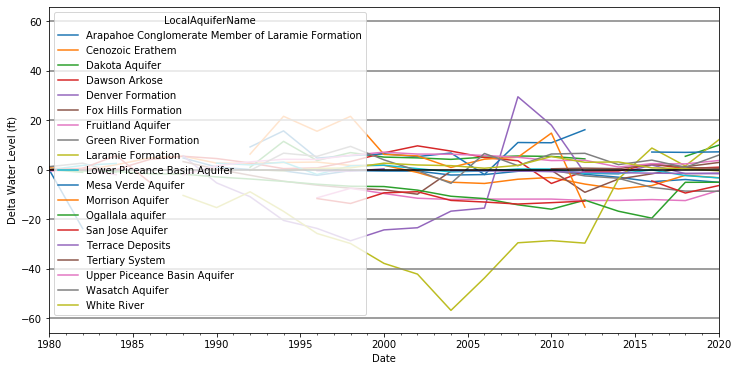

In [25]:

# Group by aquifer formation
aqfr_formation_group = df.groupby([pd.Grouper(key = 'DateEdit', freq='2Y'), 'LocalAquiferName']).delta_base_level.mean().reset_index()
aqfr_formation_group.groupby(['LocalAquiferName']).agg(['count'])


# # Plot change in ground water levels 1980-2020 grouped by aquifer formation
ax =aqfr_formation_group.pivot('DateEdit','LocalAquiferName','delta_base_level').plot()
plt.gcf().set_size_inches(12,6)
plt.ylabel('Delta Water Level (ft)')
plt.xlabel('Date')

ax.axhline(0, color ='black')
ax.axhline(-20, color ='gray')
ax.axhline(-40, color ='gray')
ax.axhline(-60, color ='gray')
ax.axhline(20, color ='gray')
ax.axhline(40, color ='gray')
ax.axhline(60, color ='gray')


# Total Change in Ground Water Levels
aquifer_formation= df.groupby(['LocalAquiferName']).total_delta.describe().reset_index()
aquifer_formation.sort_values(by='mean', ascending = True)
# aquifer_formation.head(15)

# Water Level Change: County

,CountyNm,count,mean,std,min,25%,50%,75%,max
3,Baca County,421.0,-34.586865,3.213618e+01,-123.29,-37.46,-23.35,-14.78,-0.69
18,Phillips County,333.0,-30.928919,1.781858e+01,-54.62,-46.82,-27.60,-16.44,-2.98
26,Yuma County,798.0,-28.753195,1.633999e+01,-54.16,-41.14,-29.95,-18.24,6.90
25,Washington County,672.0,-20.805670,2.278872e+01,-58.83,-46.24,-6.24,-2.40,4.00
4,Cheyenne County,229.0,-20.095677,3.284175e+01,-82.74,-46.77,-7.35,0.29,19.90
6,Costilla County,1859.0,-15.952717,1.338854e+01,-34.90,-28.12,-13.91,-4.57,41.34
22,Rio Grande County,1855.0,-10.553164,5.797143e+00,-21.38,-16.45,-10.95,-5.75,-0.28
2,Archuleta County,39.0,-8.400000,1.799578e-15,-8.40,-8.40,-8.40,-8.40,-8.40
23,Saguache County,3832.0,-8.326767,5.774868e+00,-26.68,-11.25,-9.22,-3.70,3.01
24,Sedgwick County,140.0,-7.334357,5.945761e+00,-11.60,-11.60,-11.27,-6.66,6.20


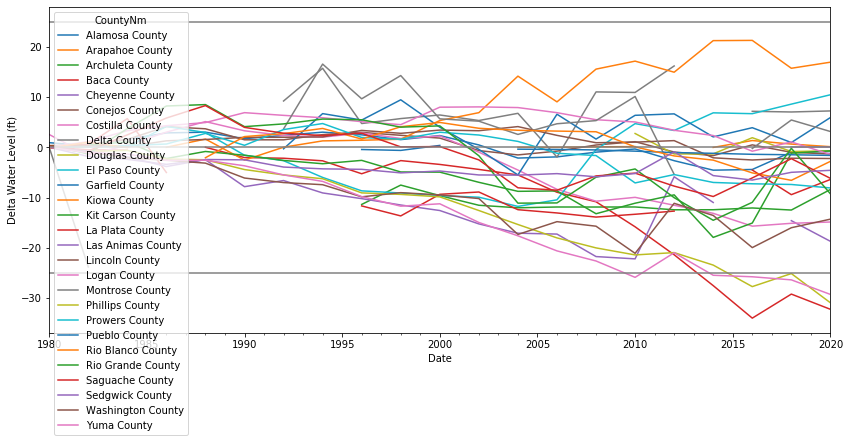

In [26]:
# Group by Colorado County and plot change in ground water depth through time
county_group = df.groupby([pd.Grouper(key = 'DateEdit', freq='2Y'), 'CountyNm']).delta_base_level.mean().reset_index()
county_group.tail(10)

ax = county_group.pivot('DateEdit','CountyNm','delta_base_level').plot()
plt.gcf().set_size_inches(14,6)
plt.ylabel('Delta Water Level (ft)')
plt.xlabel('Date')
ax.axhline(0, color ='gray')
ax.axhline(25, color ='gray')
ax.axhline(-25, color ='gray')


county= df.groupby(['CountyNm']).total_delta.describe().reset_index()
county.sort_values(by='mean', ascending = True)
# county.head(30)



,AquiferType,count,mean,std,min,25%,50%,75%,max
0,CONFINED,17574.0,-2.070105,11.999037,-47.82,-10.69,-2.73,0.71,98.8
1,UNCONFINED,48858.0,-3.420313,11.348503,-123.29,-4.41,-0.23,2.66,83.2


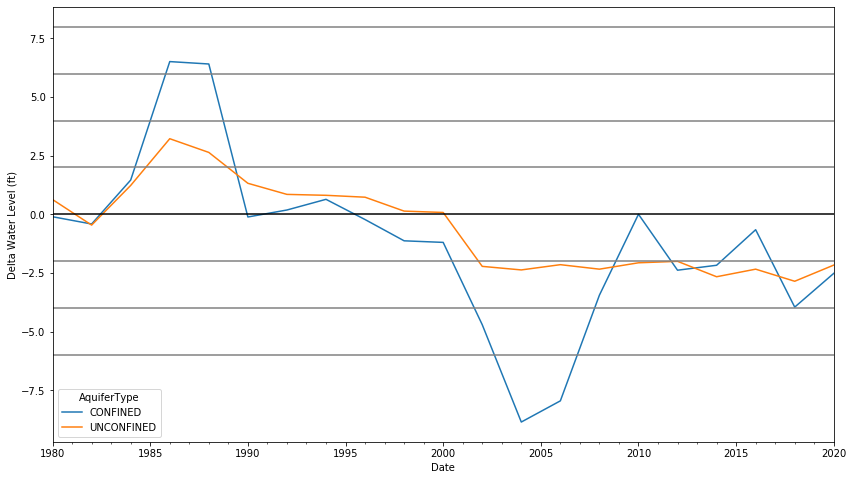

In [27]:
# Group by aquifer type and plot change in ground water depth through time for Confined and Unconfined aquifers
county_group = df.groupby([pd.Grouper(key = 'DateEdit', freq='2Y'), 'AquiferType']).delta_base_level.mean().reset_index()
county_group.tail(10)

ax=county_group.pivot('DateEdit','AquiferType','delta_base_level').plot()
plt.gcf().set_size_inches(14,8)
plt.ylabel('Delta Water Level (ft)')
plt.xlabel('Date')
ax.axhline(0, color ='black')
ax.axhline(-2, color ='gray')
ax.axhline(-4, color ='gray')
ax.axhline(-6, color ='gray')
ax.axhline(2, color ='gray')
ax.axhline(4, color ='gray')
ax.axhline(6, color ='gray')
ax.axhline(8, color ='gray')


aqftype= df.groupby(['AquiferType']).total_delta.describe().reset_index()
aqftype.head(30)


# Analysis of ground water level change from first measurement to last measurement for each well site
Due to changes in the data sampling frequency, it is necessary to analyze water depths for individual well sites through comparison of the first to the last well level values.  This will remove statisical weighting of wells which have a high sample frequency.  

In [28]:
# Record first a last measurment depths for each well site
df_first= df.groupby(['SiteNo']).water_depth_x.first().reset_index()
df_last = df.groupby(['SiteNo']).water_depth_x.last().reset_index()
df_start = df.groupby(['SiteNo']).datestart.first().reset_index()

# Merge to df 

df_merge = pd.merge(df_first,df_last, on='SiteNo', how = 'inner')
df_merge = pd.merge(df_merge,df_start, on ='SiteNo', how = 'inner')
df_merge = pd.merge(df_merge, df_site, on='SiteNo', how = 'inner')
df_merge

,SiteNo,water_depth_x_x,water_depth_x_y,datestart,DecLatVa,DecLongVa,AltVa,WellDepth,NatAqfrDesc,CountyNm,LocalAquiferName,AquiferType,well,state,StateNm
0,1,-27.32,-35.72,1983-05-26,37.159257,-107.314668,6551.6,47.0,Colorado Plateaus aquifers,Archuleta County,Fruitland Aquifer,UNCONFINED,well,CO,CO
1,2,-27.23,-33.64,1980-08-13,37.159407,-107.678401,6638.9,502.0,Colorado Plateaus aquifers,La Plata County,San Jose Aquifer,UNCONFINED,well,CO,CO
2,3,-42.61,-32.66,1980-08-12,38.200788,-108.196275,7835.0,80.0,Colorado Plateaus aquifers,Montrose County,Dakota Aquifer,CONFINED,well,CO,CO
3,4,-61.15,-64.83,1991-11-08,38.661844,-107.706380,6870.1,138.0,Colorado Plateaus aquifers,Montrose County,Morrison Aquifer,CONFINED,well,CO,CO
4,5,-65.81,-69.12,1991-09-24,40.050610,-108.247774,5969.6,1228.0,Colorado Plateaus aquifers,Rio Blanco County,Upper Piceance Basin Aquifer,UNCONFINED,well,CO,CO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
293,395136108210000,-57.64,-56.93,2010-06-22,39.860000,-108.351111,6400.0,640.0,Colorado Plateaus aquifers,Rio Blanco County,Green River Formation,CONFINED,well,CO,CO
294,395136108210001,-76.19,-78.92,2010-08-28,39.860000,-108.350278,6397.7,870.0,Colorado Plateaus aquifers,Rio Blanco County,Green River Formation,CONFINED,well,CO,CO
295,395136108210004,-61.02,-58.36,2010-06-22,39.860133,-108.350956,6399.0,249.5,Colorado Plateaus aquifers,Rio Blanco County,Tertiary System,UNCONFINED,well,CO,CO
296,395755108211400,-278.00,-295.32,2010-06-22,39.964444,-108.354167,6438.0,1260.0,Colorado Plateaus aquifers,Rio Blanco County,Green River Formation,UNCONFINED,well,CO,CO


In [29]:
# rename auto named columns
df_merge = df_merge.rename(columns={'water_depth_x_x':'water_depth_start'})
df_merge = df_merge.rename(columns={'water_depth_x_y':'water_depth_latest'})
df_merge['Total_Delta'] = df_merge['water_depth_latest']-df_merge['water_depth_start']


In [30]:
remove_outlier = df_merge['Total_Delta'] < 150
df_merge = df_merge[remove_outlier]
df_merge

,SiteNo,water_depth_start,water_depth_latest,datestart,DecLatVa,DecLongVa,AltVa,WellDepth,NatAqfrDesc,CountyNm,LocalAquiferName,AquiferType,well,state,StateNm,Total_Delta
0,1,-27.32,-35.72,1983-05-26,37.159257,-107.314668,6551.6,47.0,Colorado Plateaus aquifers,Archuleta County,Fruitland Aquifer,UNCONFINED,well,CO,CO,-8.40
1,2,-27.23,-33.64,1980-08-13,37.159407,-107.678401,6638.9,502.0,Colorado Plateaus aquifers,La Plata County,San Jose Aquifer,UNCONFINED,well,CO,CO,-6.41
2,3,-42.61,-32.66,1980-08-12,38.200788,-108.196275,7835.0,80.0,Colorado Plateaus aquifers,Montrose County,Dakota Aquifer,CONFINED,well,CO,CO,9.95
3,4,-61.15,-64.83,1991-11-08,38.661844,-107.706380,6870.1,138.0,Colorado Plateaus aquifers,Montrose County,Morrison Aquifer,CONFINED,well,CO,CO,-3.68
4,5,-65.81,-69.12,1991-09-24,40.050610,-108.247774,5969.6,1228.0,Colorado Plateaus aquifers,Rio Blanco County,Upper Piceance Basin Aquifer,UNCONFINED,well,CO,CO,-3.31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
293,395136108210000,-57.64,-56.93,2010-06-22,39.860000,-108.351111,6400.0,640.0,Colorado Plateaus aquifers,Rio Blanco County,Green River Formation,CONFINED,well,CO,CO,0.71
294,395136108210001,-76.19,-78.92,2010-08-28,39.860000,-108.350278,6397.7,870.0,Colorado Plateaus aquifers,Rio Blanco County,Green River Formation,CONFINED,well,CO,CO,-2.73
295,395136108210004,-61.02,-58.36,2010-06-22,39.860133,-108.350956,6399.0,249.5,Colorado Plateaus aquifers,Rio Blanco County,Tertiary System,UNCONFINED,well,CO,CO,2.66
296,395755108211400,-278.00,-295.32,2010-06-22,39.964444,-108.354167,6438.0,1260.0,Colorado Plateaus aquifers,Rio Blanco County,Green River Formation,UNCONFINED,well,CO,CO,-17.32


# Change in Water Depth for All Well Sites 
From 1980 to 2020 mean water levels for all well sites in the sample set show a decrease of 10.6'.  

,well,count,mean,std,min,25%,50%,75%,max
0,well,298.0,-9.230503,21.777147,-123.29,-16.42,-4.725,-0.045,98.8


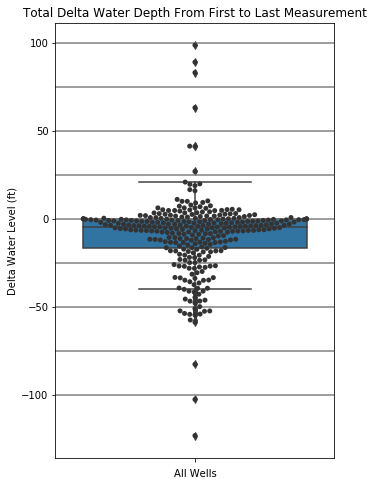

In [31]:
plt.figure(figsize = (5,8))
ax=sns.boxplot(y="Total_Delta", data=df_merge)
ax = sns.swarmplot(y="Total_Delta", data=df_merge, color=".2")
plt.xlabel('All Wells')
plt.ylabel('Delta Water Level (ft)')
plt.title('Total Delta Water Depth From First to Last Measurement')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90);
ax.axhline(0, color ='gray')
ax.axhline(25, color ='gray')
ax.axhline(50,color ='gray')
ax.axhline(75, color ='gray')
ax.axhline(-25, color ='gray')
ax.axhline(-50,color ='gray')
ax.axhline(-75, color ='gray')
ax.axhline(-100,color ='gray')
ax.axhline(100,color ='gray')

df_merge.groupby(['well']).Total_Delta.describe().reset_index()

# Change in Water Depth for Well Sites Sorted by Aquifer Type
There are 189 wells measured in unconfined aquifers vs. 31 wells measured from confined aquifers.  Wells show a decrease in water levels from 1980 to 2020 of 12.2 to 0.8 ft for confined and unconfined aquifers, respectively.  

,AquiferType,count,mean,std,min,25%,50%,75%,max
0,CONFINED,56.0,0.474286,20.860432,-47.82,-8.1175,-2.16,3.5300,98.8
1,UNCONFINED,242.0,-11.476240,21.405210,-123.29,-19.2025,-5.75,-0.4725,83.2


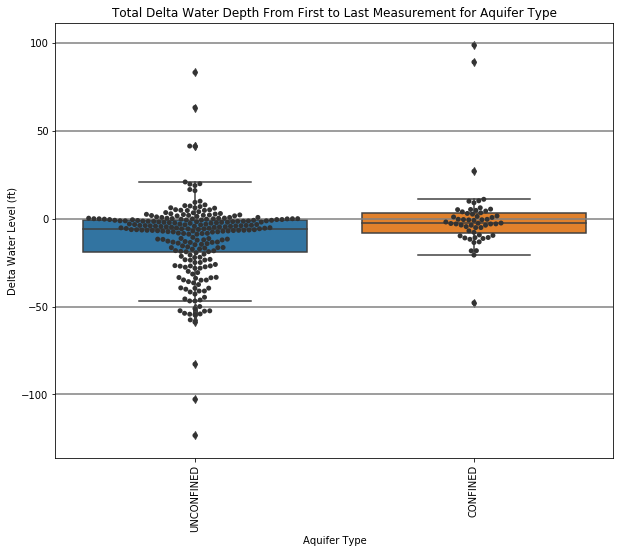

In [32]:
plt.figure(figsize = (10,8))
ax=sns.boxplot(y="Total_Delta",x ="AquiferType", data=df_merge)
ax = sns.swarmplot(x="AquiferType", y="Total_Delta", data=df_merge, color=".2")
plt.xlabel('Aquifer Type')
plt.ylabel('Delta Water Level (ft)')
plt.title('Total Delta Water Depth From First to Last Measurement for Aquifer Type')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90);
ax.axhline(0, color ='gray')
ax.axhline(50,color ='gray')
ax.axhline(-50,color ='gray')
ax.axhline(-100,color ='gray')
ax.axhline(100,color ='gray')

aquifer_type= df_merge.groupby(['AquiferType']).Total_Delta.describe().reset_index()
aquifer_type

Change in Water Depth for Well Sites Sorted by Aquifer System

,NatAqfrDesc,count,mean,std,min,25%,50%,75%,max
0,Alluvial aquifers,1.0,-1.490000,NaN,-1.49,-1.4900,-1.49,-1.490,-1.49
1,Colorado Plateaus aquifers,41.0,0.886098,22.074777,-54.32,-5.1000,-0.59,5.260,83.20
2,Denver Basin aquifer system,26.0,6.431923,27.083161,-20.69,-4.3225,2.59,5.375,98.80
3,High Plains aquifer,129.0,-18.535581,23.715783,-123.29,-33.5800,-12.20,-2.400,41.19
4,Rio Grande aquifer system,101.0,-5.561089,8.868829,-34.90,-9.5000,-3.84,-0.890,41.34


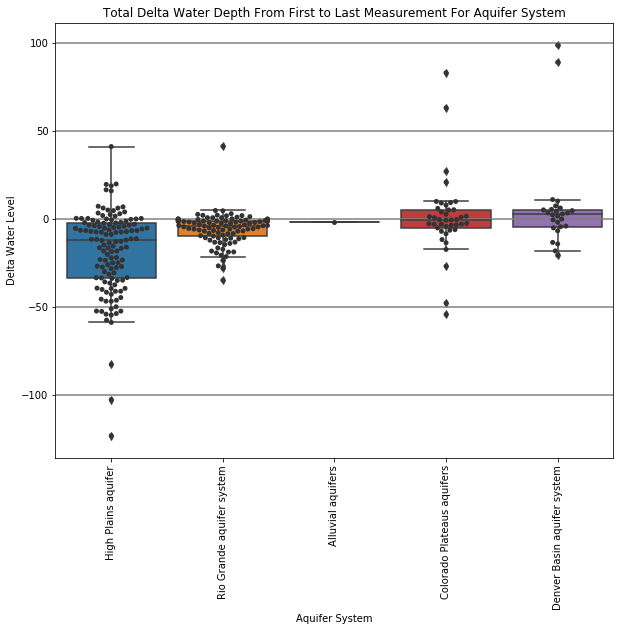

In [33]:
plt.figure(figsize = (10,8))

median_order = df_merge.groupby(by=['NatAqfrDesc'])['Total_Delta'].median().sort_values().index

ax=sns.boxplot(y="Total_Delta",x ="NatAqfrDesc", data=df_merge, order=median_order)
ax = sns.swarmplot(x="NatAqfrDesc", y="Total_Delta", data=df_merge, order=median_order, color=".2")
plt.xlabel('Aquifer System')
plt.ylabel('Delta Water Level')
plt.title('Total Delta Water Depth From First to Last Measurement For Aquifer System')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90);
ax.axhline(0, color ='gray')
ax.axhline(50,color ='gray')
ax.axhline(-50,color ='gray')
ax.axhline(-100,color ='gray')
ax.axhline(100,color ='gray')

aqfr_sys= df_merge.groupby(['NatAqfrDesc']).Total_Delta.describe().reset_index()
aqfr_sys

# Change in Water Depth for Well Sites, Sorted by Aquifer Formation
With an mean of -21.0 ft, the Ogallala aquifer shows the greatest decrease in water levels through time. The Fruitland, San Jose and Arapahoe Conglomerate also show significant decreases, but only a few well sites sample from these formations.  Wells measured from the Cenozoic Erathem number 96, show a moderate decrease of -5.5 ft.  


,LocalAquiferName,count,mean,std,min,25%,50%,75%,max
12,Ogallala aquifer,128.0,-18.670625,23.759123,-123.29,-33.6475,-12.475,-2.835,41.19
6,Fruitland Aquifer,1.0,-8.400000,NaN,-8.40,-8.4000,-8.400,-8.400,-8.40
7,Green River Formation,4.0,-8.217500,8.580813,-17.32,-14.4775,-8.130,-1.870,0.71
13,San Jose Aquifer,1.0,-6.410000,NaN,-6.41,-6.4100,-6.410,-6.410,-6.41
0,Arapahoe Conglomerate Member of Laramie Formation,3.0,-5.596667,13.295166,-20.69,-10.5850,-0.480,1.950,4.38
1,Cenozoic Erathem,101.0,-5.561089,8.868829,-34.90,-9.5000,-3.840,-0.890,41.34
11,Morrison Aquifer,1.0,-3.680000,NaN,-3.68,-3.6800,-3.680,-3.680,-3.68
9,Lower Piceance Basin Aquifer,10.0,-3.311000,18.777458,-47.82,-5.3000,-0.630,0.665,27.01
8,Laramie Formation,1.0,-1.860000,NaN,-1.86,-1.8600,-1.860,-1.860,-1.86
3,Dawson Arkose,8.0,-1.523750,8.233673,-14.18,-6.3775,1.985,3.410,7.43


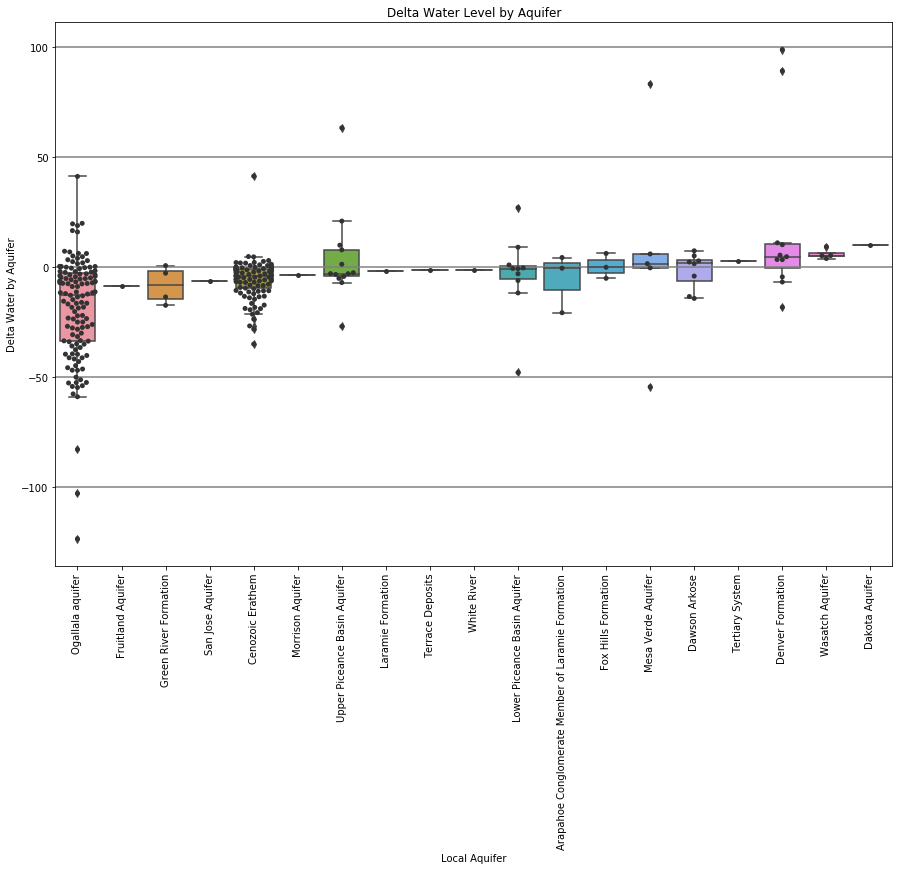

In [34]:

plt.figure(figsize = (15,10))

median_order= df_merge.groupby(by =['LocalAquiferName'])['Total_Delta'].median().sort_values().index

ax =sns.boxplot(x ="LocalAquiferName", y="Total_Delta", data=df_merge, order=median_order)
ax = sns.swarmplot(x="LocalAquiferName", y="Total_Delta", data=df_merge, order=median_order, color=".2")
plt.xlabel('Local Aquifer')
plt.ylabel('Delta Water by Aquifer')
plt.title('Delta Water Level by Aquifer')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90);
ax.axhline(0, color ='gray')
ax.axhline(50,color ='gray')
ax.axhline(-50,color ='gray')
ax.axhline(-100,color ='gray')
ax.axhline(100,color ='gray')

aqfr_formation= df_merge.groupby(['LocalAquiferName']).Total_Delta.describe().reset_index()
aqfr_formation.sort_values(by='mean', ascending= True)


# Change in Water Depth for Well Sites, by County
Wells in the agricultrual rich areas of easter colorado show significant decrease in water levels through time.  Most noteably, wells from Baca, Phillips, and Yuma Counties show a mean change of -40.7, -30.2, and -28.7 ft through from 1980-2020.  These wells are nearly exclusively located in the Ogallala aquifer.  


,CountyNm,count,mean,std,min,25%,50%,75%,max
3,Baca County,18.0,-32.480556,32.306436,-123.29,-36.8375,-22.635,-13.4300,-0.69
18,Phillips County,9.0,-29.948889,18.405976,-54.62,-46.8200,-27.600,-16.4400,-2.98
26,Yuma County,23.0,-27.130870,17.235409,-54.16,-41.1300,-28.170,-15.4950,6.90
25,Washington County,22.0,-18.274545,22.365438,-58.83,-43.1850,-5.295,-2.1000,4.00
4,Cheyenne County,8.0,-16.063750,34.785222,-82.74,-30.3750,-6.975,5.1350,19.90
12,Kit Carson County,27.0,-12.822222,17.283608,-57.55,-24.5650,-7.600,-0.1200,15.99
22,Rio Grande County,18.0,-8.442222,7.204129,-21.38,-12.8250,-5.755,-2.1050,-0.28
2,Archuleta County,1.0,-8.400000,NaN,-8.40,-8.4000,-8.400,-8.4000,-8.40
19,Prowers County,4.0,-7.995000,24.214383,-33.85,-25.0150,-8.500,8.5200,18.87
23,Saguache County,20.0,-7.993000,7.977331,-26.68,-10.8675,-6.650,-3.0100,3.01


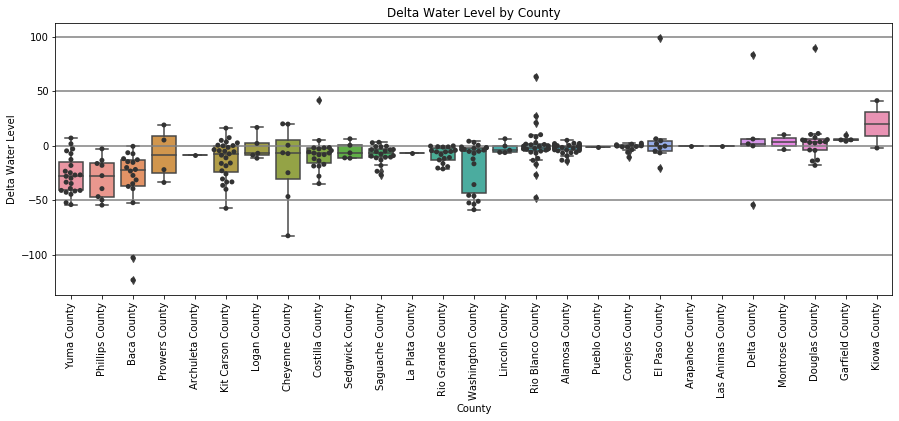

In [35]:
import seaborn as sns
from matplotlib import pyplot as plt

plt.figure(figsize = (15,5))
median_order= df_merge.groupby(by =['CountyNm'])['Total_Delta'].median().sort_values().index
ax=sns.boxplot(y="Total_Delta",x ="CountyNm", data=df_merge, order = median_order)
ax = sns.swarmplot(x="CountyNm", y="Total_Delta", data=df_merge, order = median_order, color=".2")
plt.xlabel('County')
plt.ylabel('Delta Water Level')
plt.title('Delta Water Level by County')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90);
ax.axhline(0, color ='gray')
ax.axhline(50,color ='gray')
ax.axhline(-50,color ='gray')
ax.axhline(-100,color ='gray')
ax.axhline(100,color ='gray')

county= df_merge.groupby(['CountyNm']).Total_Delta.describe().reset_index()
county.sort_values('mean', ascending=True)
# county.head(30)


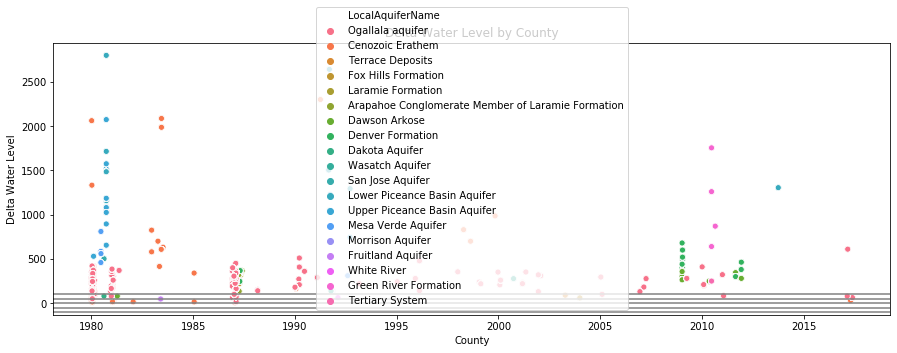

In [36]:
import seaborn as sns
# from matplotlib import pyplot as plt

plt.figure(figsize = (15,5))
# median_order= df_merge.groupby(by =['CountyNm'])['Total_Delta'].median().sort_values().index
ax=sns.scatterplot(y="WellDepth",x ="datestart", hue = 'LocalAquiferName', data=df, )
# ax = sns.swarmplot(x="CountyNm", y="Total_Delta", data=df_merge, order = median_order, color=".2")
plt.xlabel('County')
plt.ylabel('Delta Water Level')
plt.title('Delta Water Level by County')
# ax.set_xticklabels(ax.get_xticklabels(), rotation=90);
ax.axhline(0, color ='gray')
ax.axhline(50,color ='gray')
ax.axhline(-50,color ='gray')
ax.axhline(-100,color ='gray')
ax.axhline(100,color ='gray')


# Summary
In summary, based on water level values reported by the National Ground Water Monitoring Network, mean ground water levels have decreased by ~10' from 1980 to 2020.  The greatest decrease in ground water levels has taken place in wells measured in the Ogallala aquifer and located counties of eastern Colorado.  The economy of these counties is mostly derived from agriculture, which, in most of the western United States relies heavily on irrigation to support crop yield. In these areas it is critical to continue to monitor water levels and employ water conservation methods to assure future economic and resource sustainability.  